
# The Concept of the Laplacian ($\nabla^2 f$)

The Laplacian operator, denoted by $\nabla^2$ (read as "nabla squared" or "del squared"), is essentially the **divergence of the gradient** of a scalar function $f$.

$$
\text{Laplacian of } f = \nabla \cdot (\nabla f) = \nabla^2 f
$$

### What Does It Measure? 🤔

The Laplacian measures the difference between the value of a function at a point and the average value of the function around that point. It tells you about the **concavity** or **smoothness** of the function in all directions simultaneously.

*   **Positive Laplacian ($\nabla^2 f > 0$):** The function $f$ is locally **concave up** (like a bowl). The point is a local minimum, and the function is "spreading out" from that point. (Think of heat flowing away from a hot spot 🔥).
*   **Negative Laplacian ($\nabla^2 f < 0$):** The function $f$ is locally **concave down** (like an inverted bowl). The point is a local maximum, and the function is "collapsing in" toward that point. (Think of heat flowing toward a cold spot ❄️).
*   **Zero Laplacian ($\nabla^2 f = 0$):** The function is **harmonic**. This is the basis of Laplace's Equation ($\nabla^2 f = 0$), which describes steady-state phenomena like heat distribution, fluid flow, and electric potential where there are no sources or sinks. (Think of a perfectly balanced system ⚖️).

---

# The Formula Derivation

Let's see how the Laplacian is derived for a scalar function $f(x, y)$.

### Step 1: Find the Gradient ($\nabla f$)

The gradient of the scalar function $f(x, y)$ is a **vector field**:

$$
\nabla f = \left\langle \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right\rangle
$$

Let's call this resulting vector field $\mathbf{G}(x, y) = \langle P, Q \rangle$, where $P = \frac{\partial f}{\partial x}$ and $Q = \frac{\partial f}{\partial y}$.

### Step 2: Find the Divergence of the Gradient ($\nabla \cdot (\nabla f)$)

Now we take the divergence of the vector field $\mathbf{G}$ (the gradient):

$$
\nabla \cdot \mathbf{G} = \frac{\partial P}{\partial x} + \frac{\partial Q}{\partial y}
$$

Substitute $P$ and $Q$ back in:

$$
\nabla^2 f = \frac{\partial}{\partial x} \left( \frac{\partial f}{\partial x} \right) + \frac{\partial}{\partial y} \left( \frac{\partial f}{\partial y} \right)
$$

### The Final Formula

The Laplacian is the sum of the second-order partial derivatives:

$$
\nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}
$$

For a 3D function $f(x, y, z)$:

$$
\nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2} + \frac{\partial^2 f}{\partial z^2}
$$

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

## Functions

In [2]:
def plot_function(X, Y, fn, linewidth=0, title=''):
    X, Y = np.meshgrid(X, Y)
    Z = fn(X, Y)
    
    # Create figure.
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(title)

    plt.show()


## Example 1

The function:
$$
f(x, y) = \cos(\pi x) \cos(\pi y)
$$

The gradient:
$$
\frac{df(x, y)}{dx} = \left[ \begin{array}{c} -\pi \sin(\pi x) \cos(\pi y) \\
                                              -\pi \cos(\pi x) \sin(\pi y) \end{array} \right]
$$

The Laplacian:
$$
\nabla \centerdot \nabla f(x, y) = \nabla^2 f(x, y) = 
                                   -\pi^2 (2 \cos(\pi x) \sin(\pi y))
$$

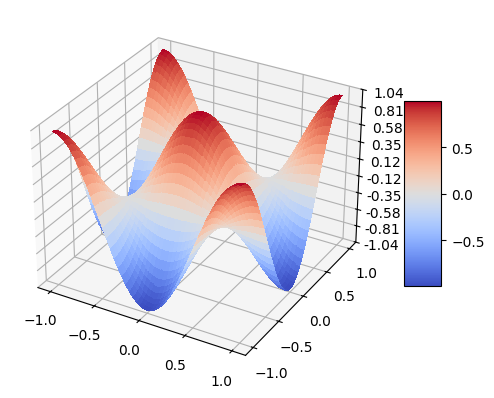

In [3]:
X = np.arange(-1, 1, 0.0025)
Y = np.arange(-1, 1, 0.0025)

f = lambda x, y : np.cos(np.pi * x) * np.cos(np.pi * y)

plot_function(X, Y, f)

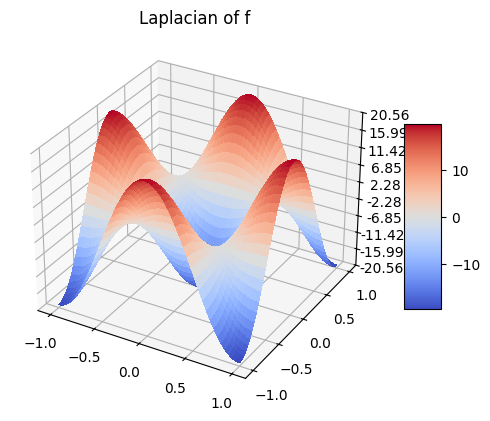

In [4]:
df = lambda x, y : (-np.pi * np.sin(np.pi * x) * np.cos(np.pi * y), \
                    -np.pi * np.cos(np.pi * x) * np.sin(np.pi * y))
laplacian = lambda x, y : -np.pi**2 * (2 * np.cos(np.pi * x) * np.cos(np.pi * y))

plot_function(X, Y, laplacian, title='Laplacian of f')

## Example 2

The function:
$$
f(x, y) = (x^2 - y^2) \sin(x)
$$

The gradient:
$$
\frac{df(x, y)}{dx} = \left[ \begin{array}{c} 2x \sin(x) + (x^2 - y^2) \cos(x) \\
                                              -2y \sin(x) \end{array} \right]
$$

The Laplacian:
$$
\nabla \centerdot \nabla f(x, y) = \nabla^2 f(x, y) = 
                                   2 (2x \cos(x) - (x^2 - y^2) \sin(x))
$$

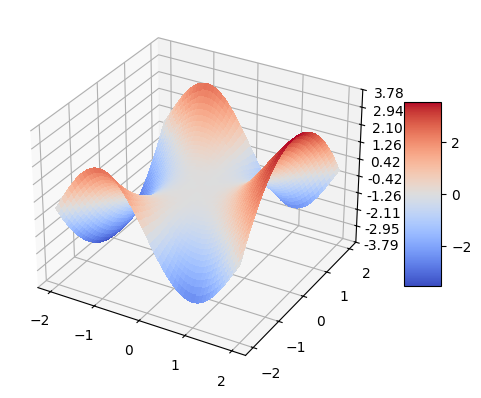

In [5]:
X = np.arange(-2, 2, 0.0025)
Y = np.arange(-2, 2, 0.0025)

f = lambda x, y : (x**2 - y**2) * np.sin(x)

plot_function(X, Y, f)

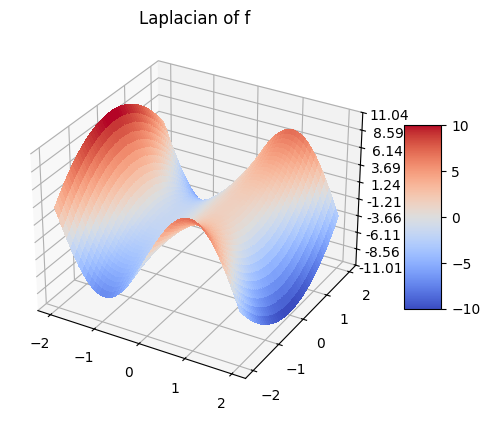

In [6]:
laplacian = lambda x, y : 2 * (2 * x * np.cos(x) - (x**2 - y**2) * np.sin(x))

plot_function(X, Y, laplacian, title='Laplacian of f')